In [5]:
import os
import json
import torch
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

from image_to_latex.lit_models import LitResNetTransformer
from model.DistillModel import DistillModel
from pytorch_lightning import Trainer
from torch.autograd import Variable
from PIL import Image

from torch.utils.data import DataLoader, Dataset
from albumentations.pytorch.transforms import ToTensorV2
from pytorch_lightning import Trainer
from model.img2latex.data.utils import Tokenizer, get_all_formulas, get_split 


In [6]:
model_path = "/home/chris/git/Distill/outputs/2022-09-22/17-02-15/wandb/latest-run/files/Distill-im2latex/kp4xwxk7/checkpoints/epoch=13-val/loss=-1.54-val/cer=0.17.ckpt"
model = DistillModel.load_from_checkpoint(model_path)

In [7]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print(params)

7104194


In [8]:
class BaseDataset(Dataset):
    def __init__(self, image_name, formula, transform):
        self.image_names = image_name
        self.formulas = formula
        self.transform = transform
        
    def __len__(self):
        return len(self.formulas)
    
    def __getitem__(self, idx):
        idx = 100
        image_name, formula = self.image_names[idx], self.formulas[idx]
        image = Image.open(f'./data/formula_images_processed/{image_name}.png').convert("L")
        image = self.transform(image=np.array(image))["image"]
        return image, formula

In [9]:

formula_file = './data/im2latex_formulas.norm.new.lst'
all_formulas = get_all_formulas(formula_file)

test_image_names, test_formulas = get_split(all_formulas, './data/im2latex_test_filter.lst')
idx = 5
test_image_name = test_image_names[idx]
test_formula = test_formulas[idx]

test_dataset = BaseDataset(test_image_names, test_formulas, ToTensorV2())
test_dataloader = DataLoader(test_dataset, shuffle=False, batch_size=1, num_workers=4, pin_memory=False)

# datamodule = Im2Latex()
# datamodule.setup()
# trainer = Trainer(gpus=1)
# trainer.test(model, datamodule=datamodule)
tokenizer = Tokenizer.load('./model/img2latex/data/vocab.json')

In [21]:
for i, (X, y) in enumerate(test_dataloader):
    if i == 0: 
        print(X.size())
        preds = model.model.predict(X.float())
        # print(preds)
        for pred in preds:
            decoded = tokenizer.decode(pred.tolist())
            decoded_str = " ".join(decoded)
            print(decoded_str)
        # print(y)
        decoded_str = " "
        for s in y:
            # decoded = tokenizer.decode(s.tolist())
            # print(type(s))
            # print(str(s).split('\'')[1])
            decoded_str += str(s).split('\'')[1]
            decoded_str += " "
        print("target")
        print(decoded_str)
    else: 
        break

torch.Size([1, 1, 100, 500])
{ \cal L } ( J ) = \frac { 1 } { 2 } Q _ { \mu } \phi { \phi } ^ { a } \phi { + \frac { J } { 2 } } } \phi ^ { 2 } + \frac { \lambda a ^ { 4 c } } { \mathrm { d e } } } { 8 ! } } \phi ^ { \alpha } \star { \cal { \cal { E } _ { \mathrm { C } } ( { \cal L } ) - \mu } ^ { - \infty } { { S } J ^ { 2 } .
target
 { \\cal L } ( J ) = \\frac { 1 } { 2 } \\partial _ { \\mu } \\phi \\partial ^ { \\mu } \\phi + \\frac { J } { 2 } \\phi ^ { 2 } + \\frac { \\lambda \\mu ^ { 2 \\varepsilon } } { 4 ! } \\phi ^ { 4 } + { \\cal L } _ { \\mathrm { C T } } ( J ) - \\mu ^ { - 2 \\varepsilon } \\frac { \\zeta } { 2 } \\; J ^ { 2 } . 


predict：
\frac { d } { d s } C _ { i } = \frac { 1 } { 2 } \epsilon _ { i j k } C _ { j } \times C _ { k } \, . 

target：
\frac { d } { d s } { \bf C } _ { i } = \frac { 1 } { 2 } \epsilon _ { i j k } { \bf C } _ { j } \times { \bf C } _ { k } \, .


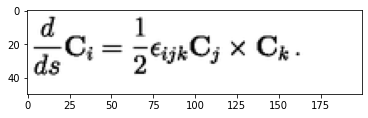

In [27]:
img = test_image_names[4]
image = Image.open(f'./data/formula_images_processed/{img}.png').convert("L")
plt.imshow(image, cmap='gray')
print('predict：')
print(open('/home/chris/git/Distill/outputs/2022-09-22/17-02-15/test_predictions.txt').readlines()[test_image_names.index(img)])
print('target：')
print(" ".join(test_formulas[test_image_names.index(img)]))